In [1]:
%pylab inline
from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.infer.coarse_to_fine_init import ModelSpec, EventRunSpec, do_coarse_to_fine, initialize_from, do_inference
from sigvisa.infer.correlations.event_proposal import correlation_location_proposal, generate_historical_db
from sigvisa.infer.correlations.ar_correlation_model import estimate_ar, ar_advantage, iid_advantage

from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.treegp.gp import GPCov

import os, sys, traceback
import cPickle as pickle

stas = ['ASAR', 'KURK', 'MKAR', 'SONM', 'BVAR', 'FITZ', 'CTA', 'CMAR', 'WRA', 'ZALV', 'MJAR', 'AKTO', 'INK']

doublet = 5334939

evids = [5334501, 5334991, 5334726, 5335144, 5349684, 5335822, 5348178, 5334971, 5349536, 5335079, 5335116, 5335138, 5350499, 5336237, 5335425, 5335424, 5349441, 5336640, 5335577, 5350077, 5336889, 5335760, 5336967, 5337111, 533\
6015, 5337461, 5351821, 5351657, 5336724, 5351713, 5338302, 5338318, 5338388]


Populating the interactive namespace from numpy and matplotlib


In [2]:
hstas = ['AS12', 'MK31', 'CM16', 'FITZ']
history = generate_historical_db(hstas, evids, bands=["freq_0.8_4.5"], chans=["auto"],len_s=10.0)

1240230341.75 1240230774.37
1240230715.08 1240230925.08
1240230507.45 1240231082.55
1240230272.99 1240230482.99
1240232137.9 1240232347.9
1240232513.78 1240232723.78
1240232305.2 1240232515.2
1240232072.21 1240232282.21
1240238431.9 1240238641.9
1240238805.45 1240239015.45
1240238597.0 1240238807.0
1240238363.61 1240238573.61
1240239571.7 1240239781.7
1240239944.45 1240240154.45
1240239735.6 1240239945.6
1240239503.84 1240239713.84
1240240498.5 1240240708.5
1240240870.53 1240241080.53
no arrivals found for evid 5349684 at station CM16
no arrivals found for evid 5349684 at station FITZ
1240241574.35 1240242005.69
1240241946.92 1240242164.7
1240241739.3 1240241949.3
1240241505.56 1240241715.56
1240243583.0 1240243793.0
1240243956.05 1240244166.05
1240243748.3 1240243958.3
1240243514.91 1240243724.91
1240247464.0 1240247674.0
1240247836.82 1240248046.82
no arrivals found for evid 5334971 at station CM16
no arrivals found for evid 5334971 at station FITZ
1240249325.45 1240249535.45
1240249

In [3]:
doublet_ev = get_event(evid=doublet)
rs = EventRunSpec(evids=[doublet,], stas=["MKAR"], runids=(1,), disable_conflict_checking=False)

ms1 = ModelSpec(template_model_type="param", wiggle_family="db4_2.0_3_15.0", wiggle_model_type="gp_lld", max_hz=10.0, raw_signals=True)

#ms1 = ModelSpec(template_model_type="param", wiggle_family="iid", max_hz=10.0, raw_signals=True)
sg = rs.build_sg(ms1)
sg.event_end_time = doublet_ev.time + 200
sg.event_start_time = doublet_ev.time - 200


In [4]:
history[5][0].depth = 0.0
print sg.current_log_p()

-10549.4804188


In [5]:
from sigvisa.source.event import Event
def const_proposal(sg, fix_result=False, **kwargs):    
    ev = Event(lon=129.72, lat=-4.21, depth=11.0, time=1240245384.6, mb=4.0)
    if fix_result:
        return 0.0
    else:
        return ev, 0.0, ()

In [23]:
from sigvisa.infer.event_birthdeath import ev_birth_move_abstract
def correlation_prop_MKAR(sg, fix_result=None):
    return correlation_location_proposal(sg, history=history, stas=["MK31"], fix_result=fix_result)

ev_birth_move_abstract(sg, location_proposal=const_proposal, #correlation_prop_MKAR,
                       proposal_includes_mb=False, use_correlation=True, force_outcome=True)

proposing new ev evid None, loc 129.72 E 4.21 S, depth 11.0km, time 1240245384.6, mb 4.0, natural source
proposing to associate template 1 at MK31,P with assoc lp -0.0
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 4.340937
birth qforward +  -5.00347892547e-05 4.34093655173 = 4.34088651694
proposing to deassociate at MK31 (lp -0.0)
eid 8 proposing mb 6.9103507616 from dist 5.76255842725 2.76179214869
birth helper -1.74767391431 4.34088651694 0.0 3.18134876845
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -14.6
ev observations: ev 0.0
tt_residual: ev -3.0
ev global cost (n + priors + tt): -25.5
coda_decay: ev -6.8 ua 0.0 total -6.8
peak_decay: ev -2.7 ua 0.0 total -2.7
peak_offset: ev -2.1 ua 0.0 total -2.1
coda_height: ev -1.7 ua 0.0 total -1.7
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -13.4 ua 0.0 total -13.4
priors+params: ev -38.9 ua -0.0 total -38.9
station noise (observed signals): -3686.7
overall: -3725.6
official: -3725.6
birth m

True

In [7]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

-3704.12556496
(1, 'P')
{'coda_height': 1.696784483826732, 'arrival_time': 1240246032.386225, 'coda_decay': -2.6827916099238314, 'peak_decay': -1.871280902474631, 'peak_offset': 0.05573546670522684}


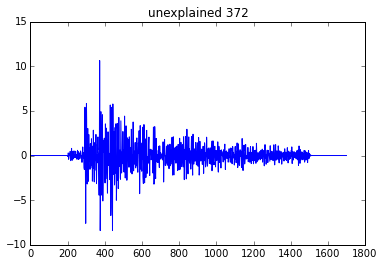

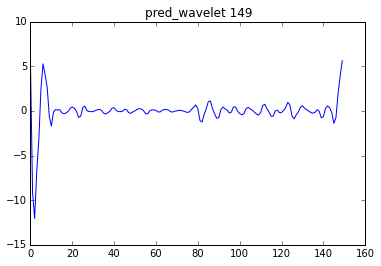

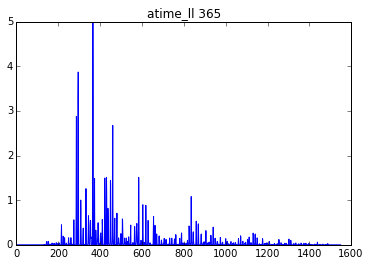

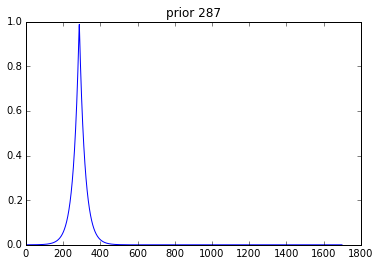

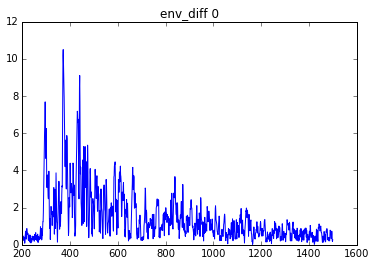

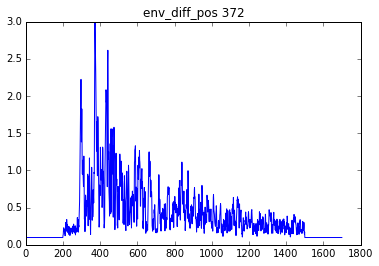

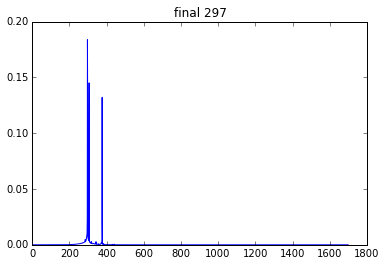

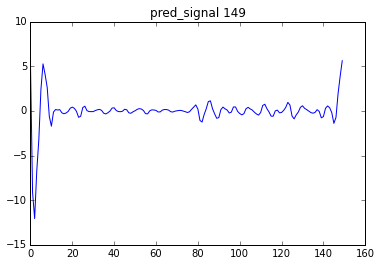

In [8]:
dd = sg.debug_dists["wave_MK31_BHZ_freq_0.8_4.5_1240246002.8"]
for k in dd.keys():
    figure()
    plot(dd[k])
    title("%s %d" % (k, np.argmax(dd[k])))

In [9]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-3704.12556496
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -7.1
ev observations: ev 0.0
tt_residual: ev -3.0
ev global cost (n + priors + tt): -18.1
coda_decay: ev -1.4 ua 0.0 total -1.4
peak_decay: ev -1.2 ua 0.0 total -1.2
peak_offset: ev -1.3 ua 0.0 total -1.3
coda_height: ev -2.4 ua 0.0 total -2.4
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -6.2 ua 0.0 total -6.2
priors+params: ev -24.3 ua -0.0 total -24.3
station noise (observed signals): -3679.9
overall: -3704.1
official: -3704.1
None


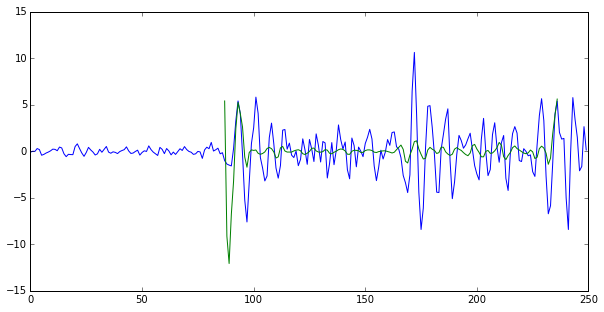

In [10]:
plt.figure(figsize=(10, 5))
plot(dd["unexplained"][200:450])
l = len(dd["pred_signal"])
plot(np.arange(87, 87+l), dd["pred_signal"])

In [11]:
print wn.get_template_params_for_arrival(4, "P")
print (1240246031.4047399 - wn.st)*wn.srate
print wn.tssm_components

KeyError: (4, 'P')

-3679.87269654
-13057.0050794


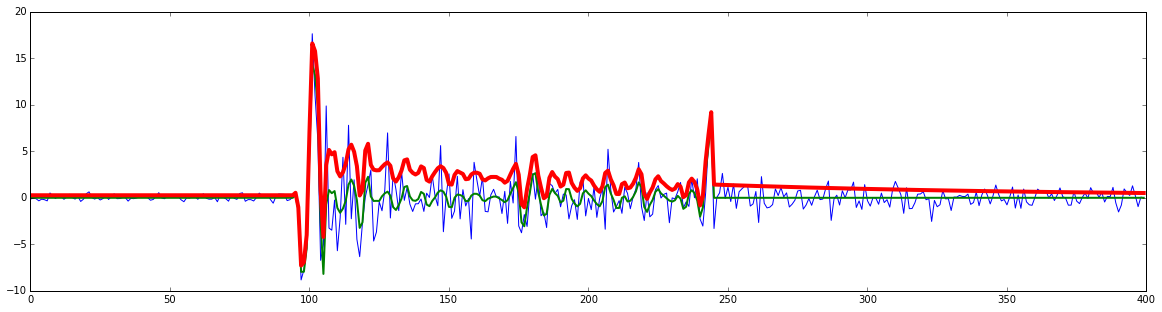

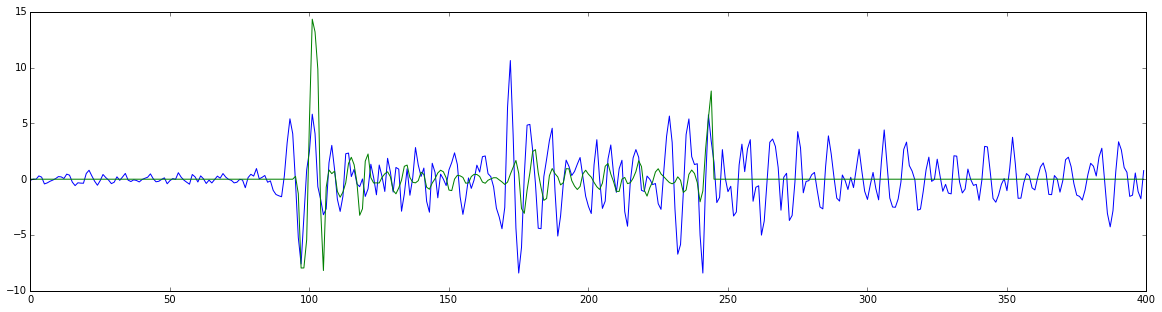

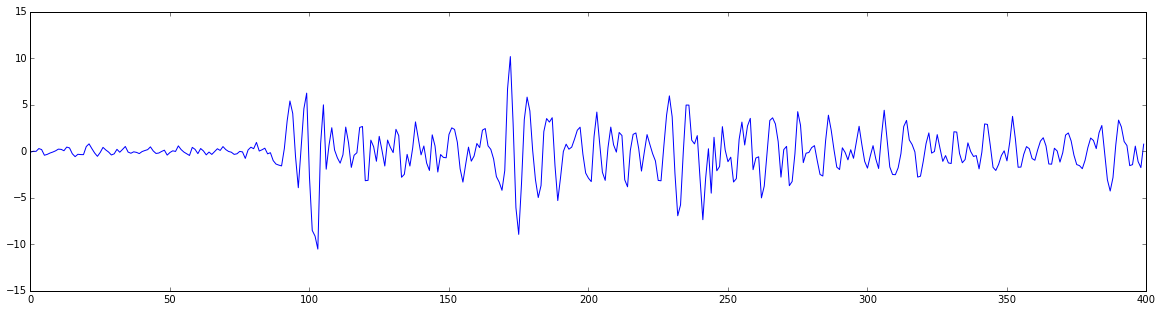

In [12]:
f = figure(figsize=(20, 5))
wn = sg.station_waves["MK31"][0]
z1 = wn.tssm.prior_sample(1700, 0)
plot(z1[200:600])
s1 = wn.tssm.obs_var(1700)
m1 = wn.tssm.mean_obs(1700)
plot(m1[200:600], lw=2)
plot(m1[200:600]+np.sqrt(s1)[200:600], lw=4)
print wn.log_p()
u1 = wn.unexplained_kalman()
figure(figsize=(20, 5))
plot(wn.get_value()[200:600])
#plot(u1[200:600])
plot(m1[200:600])

figure(figsize=(20, 5))
subtracted1 = wn.get_value() - m1

plot(subtracted1[200:600])
print wn.nm.log_p(subtracted1)


In [13]:
from sigvisa.infer.event_birthdeath import ev_death_move_abstract
ev_death_move_abstract(sg, location_proposal=correlation_prop_MKAR,  
                       proposal_includes_mb=False, use_correlation=True)

reverse dist 5.77400700541 7.63428565926 old mb 3.67139452502 lp -1.95101430664
proposing to deassociate at MK31 (lp -0.0)
proposing to associate template 1 at MK31,P with assoc lp -0.0
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 3.361576
birth qforward +  -5.00347892547e-05 3.36157611935 = 3.36152608456
death helper -1.95101430664 3.36152608456 -1.3724424385
death move acceptance 599.943413358 from -3704.12556496 -3101.03887217 0.0380693394259 3.18134876845


/home/dmoore/python/sigvisa/infer/correlations/weighted_event_posterior.py:39: RuntimeWarning: divide by zero encountered in log
  origin_ll = np.log(rr) + llmax


True

In [14]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

-3101.03887217
(-1, 'UA')
{'coda_height': 1.8033181731746548, 'arrival_time': 1240246031.0154285, 'coda_decay': -2.6827916099238314, 'peak_decay': -1.871280902474631, 'peak_offset': 0.05573546670522684}


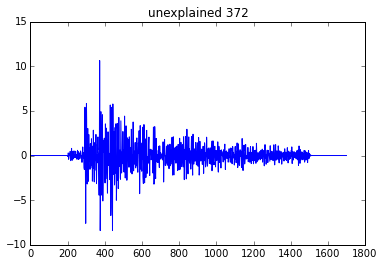

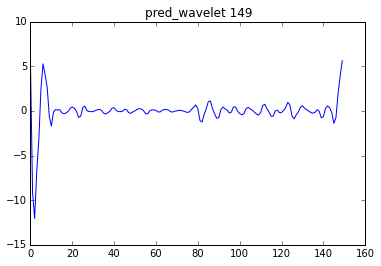

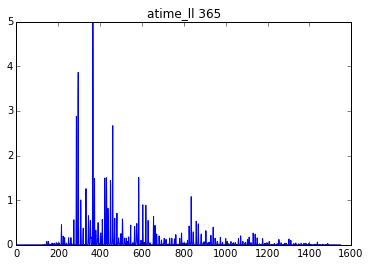

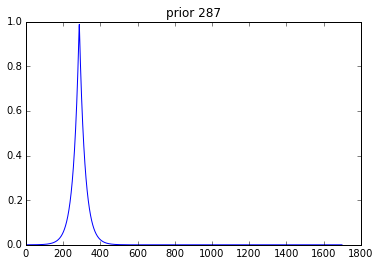

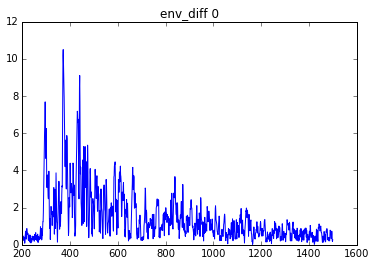

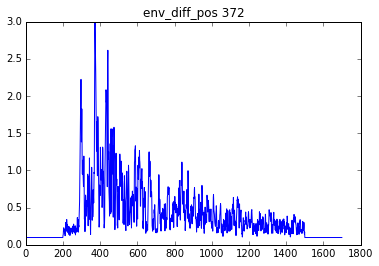

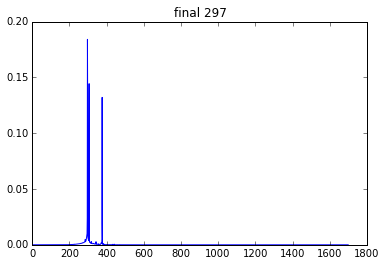

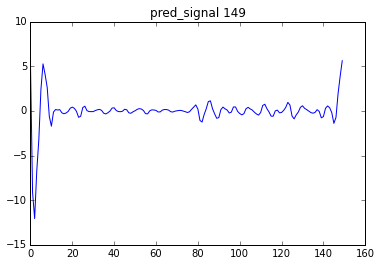

In [15]:
dd = sg.debug_dists["wave_MK31_BHZ_freq_0.8_4.5_1240246002.8"]
for k in dd.keys():
    figure()
    plot(dd[k])
    title("%s %d" % (k, np.argmax(dd[k])))

-3080.37434462
-10548.4150526


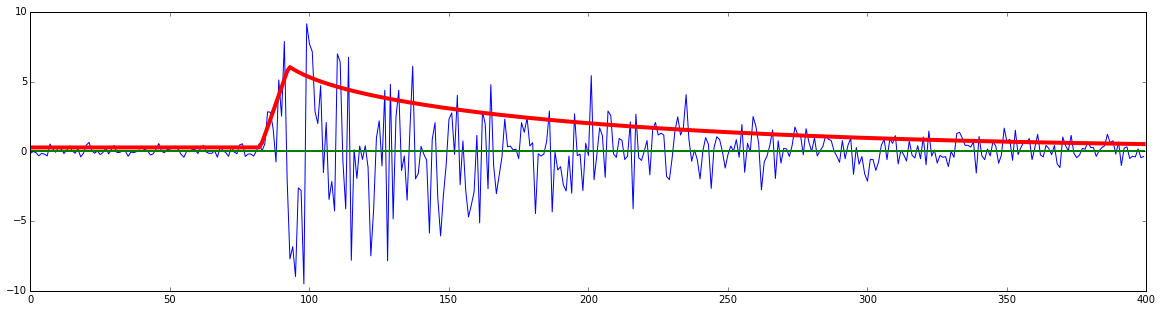

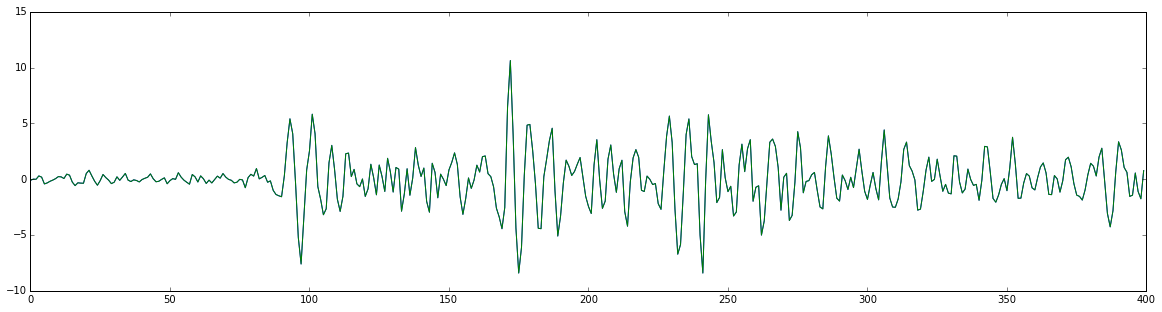

In [16]:
f = figure(figsize=(20, 5))
wn._parent_values()
wn = sg.station_waves["MK31"][0]
z2 = wn.tssm.prior_sample(1700, 0)
plot(z2[200:600])
s2 = wn.tssm.obs_var(1700)
m2 = wn.tssm.mean_obs(1700)
plot(m2[200:600], lw=2)
plot(np.sqrt(s2)[200:600], lw=4)
print wn.log_p()
u2 = wn.unexplained_kalman()
figure(figsize=(20, 5))
plot(wn.get_value()[200:600])
plot(u2[200:600])
print wn.nm.log_p(wn.get_value() - m2)

In [17]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-2930.27831017
n_uatemplate: -13.8
n_event: -1.2
ev priors: ev 0.0
ev observations: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + tt): -1.2
coda_decay: ev 0.0 ua -1.3 total -1.3
peak_decay: ev 0.0 ua -1.1 total -1.1
peak_offset: ev 0.0 ua -1.0 total -1.0
coda_height: ev 0.0 ua -2.1 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -5.6 total -5.6
priors+params: ev -1.2 ua -19.4 total -20.6
station noise (observed signals): -2909.6
overall: -2930.3
official: -2930.3
None


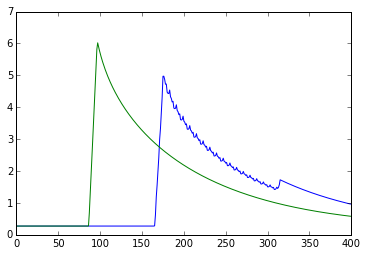

In [18]:
plot(np.sqrt(s1)[200:600])
plot(np.sqrt(s2)[200:600])
